In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import nltk
from collections import Counter


In [2]:
news_df = pd.read_csv('news_df_cleaned.csv')
news_df

,headline,source,text,classification,text_cleaned,text_tokenized,text_removed_stopwords,text_lemmatized,headline_cleaned,headline_tokenized,headline_removed_stopwords,headline_lemmatized
0,Tillerson To Visit Africa In First Quarter Of ...,reuters,U.S. Secretary of State Rex Tillerson is pla...,real,u s secretary of state rex tillerson is plann...,"['u', 's', 'secretary', 'of', 'state', 'rex', ...","['u', 'secretary', 'state', 'rex', 'tillerson'...","['u', 'secretary', 'state', 'rex', 'tillerson'...",tillerson to visit africa in first quarter of ...,"['tillerson', 'to', 'visit', 'africa', 'in', '...","['tillerson', 'visit', 'africa', 'first', 'qua...","['tillerson', 'visit', 'africa', 'first', 'qua..."
1,Swedish Court Sentences Syrian Asylum Seeker T...,reuters,A Swedish court on Monday sentenced a Syrian...,real,a swedish court on monday sentenced a syrian ...,"['a', 'swedish', 'court', 'on', 'monday', 'sen...","['swedish', 'court', 'monday', 'sentenced', 's...","['swedish', 'court', 'monday', 'sentenced', 's...",swedish court sentences syrian asylum seeker t...,"['swedish', 'court', 'sentences', 'syrian', 'a...","['swedish', 'court', 'sentences', 'syrian', 'a...","['swedish', 'court', 'sentence', 'syrian', 'as..."
2,Irish Election Likely After Opposition Submits...,reuters,An Irish general election appeared likely af...,real,an irish general election appeared likely aft...,"['an', 'irish', 'general', 'election', 'appear...","['irish', 'general', 'election', 'appeared', '...","['irish', 'general', 'election', 'appeared', '...",irish election likely after opposition submits...,"['irish', 'election', 'likely', 'after', 'oppo...","['irish', 'election', 'likely', 'opposition', ...","['irish', 'election', 'likely', 'opposition', ..."
3,Argentina Blocks Some Activists From Attending...,reuters,Argentina revoked the credentials of some ac...,real,argentina revoked the credentials of some act...,"['argentina', 'revoked', 'the', 'credentials',...","['argentina', 'revoked', 'credentials', 'activ...","['argentina', 'revoked', 'credential', 'activi...",argentina blocks some activists from attending...,"['argentina', 'blocks', 'some', 'activists', '...","['argentina', 'blocks', 'activists', 'attendin...","['argentina', 'block', 'activist', 'attending'..."
4,"Kremlin, After Kurdish Vote, Says Supports Int...",reuters,The Kremlin on Tuesday signaled its oppositi...,real,the kremlin on tuesday signaled its oppositio...,"['the', 'kremlin', 'on', 'tuesday', 'signaled'...","['kremlin', 'tuesday', 'signaled', 'opposition...","['kremlin', 'tuesday', 'signaled', 'opposition...",kremlin after kurdish vote says supports integ...,"['kremlin', 'after', 'kurdish', 'vote', 'says'...","['kremlin', 'kurdish', 'vote', 'says', 'suppor...","['kremlin', 'kurdish', 'vote', 'say', 'support..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14757,Obama Said America Wants Him Back For A 3Rd Te...,The Conservative Millennial,"Earlier this year, in a speech to the Africa...",fake,earlier this year in a speech to the african ...,"['earlier', 'this', 'year', 'in', 'a', 'speech...","['earlier', 'year', 'speech', 'african', 'unio...","['earlier', 'year', 'speech', 'african', 'unio...",obama said america wants him back for a 3rd te...,"['obama', 'said', 'america', 'wants', 'him', '...","['obama', 'said', 'america', 'wants', 'back', ...","['obama', 'said', 'america', 'want', 'back', '..."
14758,Spain To Review Permission For Syria Bound Rus...,Carol Adl,"Carol Adl in News , World // 1 Comment Spai...",fake,carol adl in news world 1 comment spain is ha...,"['carol', 'adl', 'in', 'news', 'world', '1', '...","['carol', 'adl', 'news', 'world', '1', 'commen...","['carol', 'adl', 'news', 'world', '1', 'commen...",spain to review permission for syria bound rus...,"['spain', 'to', 'review', 'permission', 'for',...","['spain', 'review', 'permission', 'syria', 'bo...","['spain', 'review', 'permission', 'syria', 'bo..."
14759,Pakistan Conducts Training Maneuvers At The Bo...,Na

Distribution of classification column. 

We can see it's around 50/50 which means we have no data imbalance to deal with.

<AxesSubplot:xlabel='classification'>

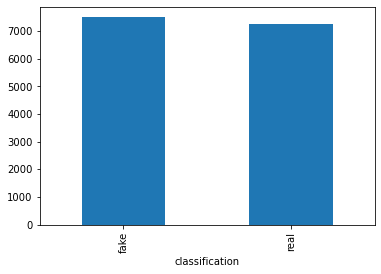

In [35]:
news_df.groupby(['classification']).size().plot(kind='bar')


In [3]:
fake_df = news_df[news_df['classification'] == 'fake']
real_df = news_df[news_df['classification'] == 'real']

## **Top 10 most common words occuring in fake news articles**

In [5]:
# create a variable of all the words from the text column for the word cloud

fake_text = " ".join(row for row in fake_df['text_lemmatized'].astype(str))

In [6]:
ex = "'u',"

In [7]:
fake_text_clean = fake_text.replace(ex, '').strip().replace("'", "").replace(",", "")

In [8]:
fake_words = pd.DataFrame(Counter(fake_text_clean.split()).most_common(10), columns=['word', 'frequency'])
fake_words

,word,frequency
0,trump,16138
1,clinton,15740
2,people,13969
3,one,13351
4,state,12361
5,would,12125
6,hillary,10078
7,time,10010
8,said,9527
9,year,8820


## **Top 10 most common words occuring in fake news headlines**

In [11]:
fake_headlines = " ".join(row for row in fake_df['headline_lemmatized'].astype(str)).lower()

In [19]:
fake_headlines_cleaned = fake_headlines.replace("'", "").replace("[", "").replace("u,", "").replace(",", "")

In [20]:
headlines = pd.DataFrame(Counter(fake_headlines_cleaned.split()).most_common(10), columns=['word', 'frequency'])
headlines

,word,frequency
0,trump,1014
1,hillary,760
2,clinton,700
3,new,355
4,election,302
5,comment,286
6,russia,271
7,war,262
8,fbi,259
9,america,228


## **Top 10 sources for fake news**

In [36]:
fake_df['source'].value_counts()

admin                                                                    144
BareNakedIslam                                                            78
The European Union Times                                                  76
Pakalert                                                                  74
IWB                                                                       74
                                                                        ... 
Victor                                                                     1
Ain’t No Sunshine: Seasonal SADness and Magnesium | Activation Health      1
AssHat900                                                                  1
Frankie                                                                    1
Michael Greger                                                             1
Name: source, Length: 1327, dtype: int64

In [46]:
source_df = fake_df['source'].value_counts().reset_index().rename(
           columns={'index': 'source', 0: 'count'})
source_df[:10]

,source,source
0,admin,144
1,BareNakedIslam,78
2,The European Union Times,76
3,Pakalert,74
4,IWB,74
5,Alex Ansary,74
6,noreply@blogger.com (Alexander Light),73
7,Eddy Lavine,73
8,Dave Hodges,73
9,Gillian,73


## **Top 10 most common words occuring in real news articles**

In [30]:
real_text = " ".join(row for row in real_df['text_lemmatized'].astype(str))

In [32]:
real_text_clean = real_text.replace(ex, '').strip().replace("'", "").replace(",", "")

In [33]:
real_words = pd.DataFrame(Counter(real_text_clean.split()).most_common(10), columns=['word', 'frequency'])
real_words

,word,frequency
0,said,25506
1,state,8234
2,government,6823
3,would,6286
4,year,5803
5,president,5037
6,party,5019
7,people,4910
8,country,4612
9,also,4393


## **Top 10 most common words occuring in real news headlines**

In [22]:
# create variable of all the words used in the text column

real_headlines = " ".join(row for row in real_df['headline_lemmatized'].astype(str))

In [28]:
real_headlines_clean = real_headlines.replace(ex, '').strip().replace("'", "").replace(",", "").replace("[", "")

In [29]:
real_words = pd.DataFrame(Counter(real_headlines_clean.split()).most_common(10), columns=['word', 'frequency'])
real_words

,word,frequency
0,say,844
1,trump,360
2,north,343
3,new,325
4,korea,312
5,china,304
6,eu,225
7,south,223
8,state,221
9,russia,219


## **Wordclouds**

A wordcloud is a visual representation of words. They highlight words based on frequency.

In [12]:
# set stopwords (such as 'the', 'a' etc) - these won't be included in the word clouds as they don't provide any meaning

stopwords = set(STOPWORDS)

stopwords.update(["S", "U", "will", "one", "u", "s", "t", "N"])

In [6]:


def plot_cloud(wordcloud, height, width):
    # Set figure size
    plt.figure(figsize=(height, width))

    plt.style.use('dark_background')
    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off");

Lets take a look at the fake news first

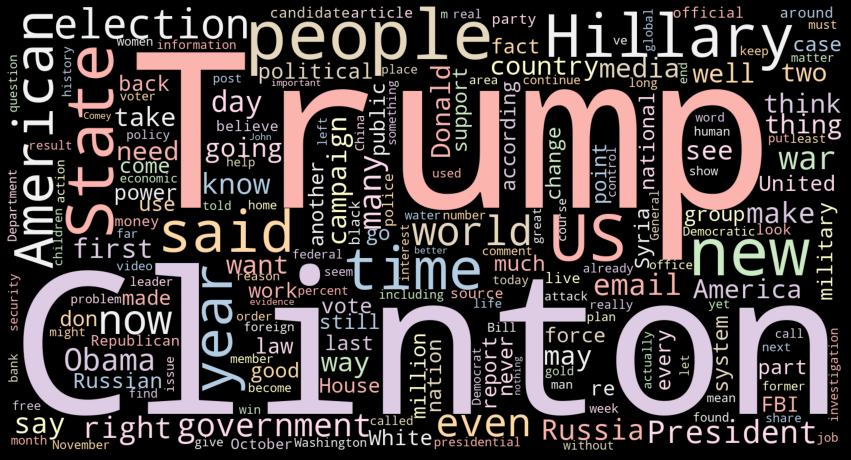

In [50]:
fake_text = " ".join(row for row in fake_df['text'].astype(str))

wordcloud_fake = WordCloud(width= 1500, height = 800, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords=stopwords).generate(fake_text)

plot_cloud(wordcloud_fake, 15, 10)

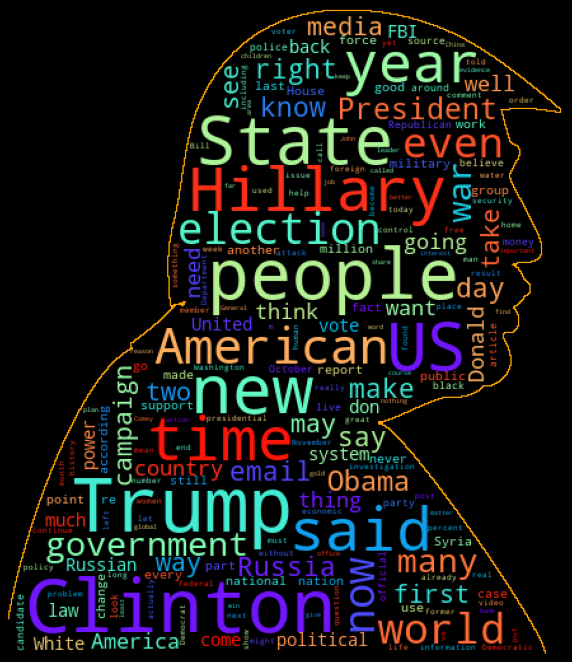

In [22]:
# here is the same cloud with a different style :)

mask = np.array(Image.open('trump.png'))

wordcloud_fake = WordCloud(width = 40, height = 60, random_state=1, background_color='black', colormap='rainbow', contour_color='orange', contour_width=1, collocations=False, stopwords = stopwords, mask=mask).generate(fake_text)

plot_cloud(wordcloud_fake, 10, 12)

Here is a word cloud for the fake headlines too

- we can see it's pretty similar to the text. Trump and Hillary are featuring heavily again. 
- the fake news dataset is from 2016 which was the year of the trump vs clinton election so not surprising.

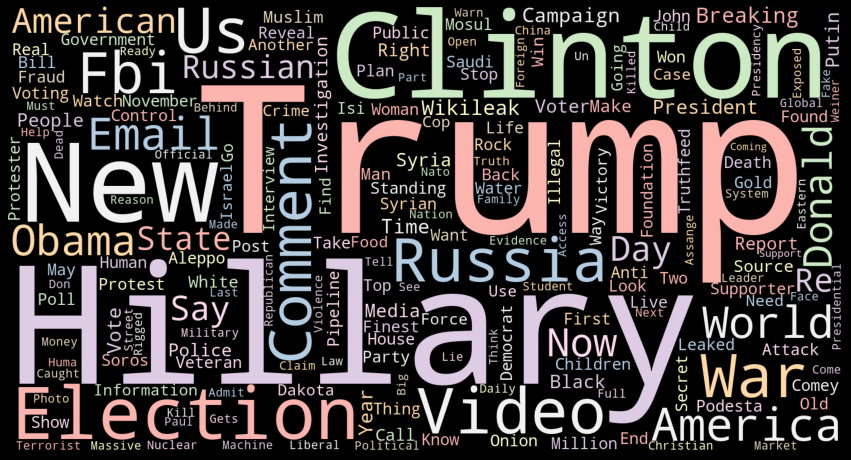

In [52]:
fake_headlines = " ".join(row for row in fake_df['headline'].astype(str))

wordcloud_fake = WordCloud(width= 1500, height = 800, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords=stopwords).generate(fake_headlines)

plot_cloud(wordcloud_fake, 15, 10)

Now lets look at the real news

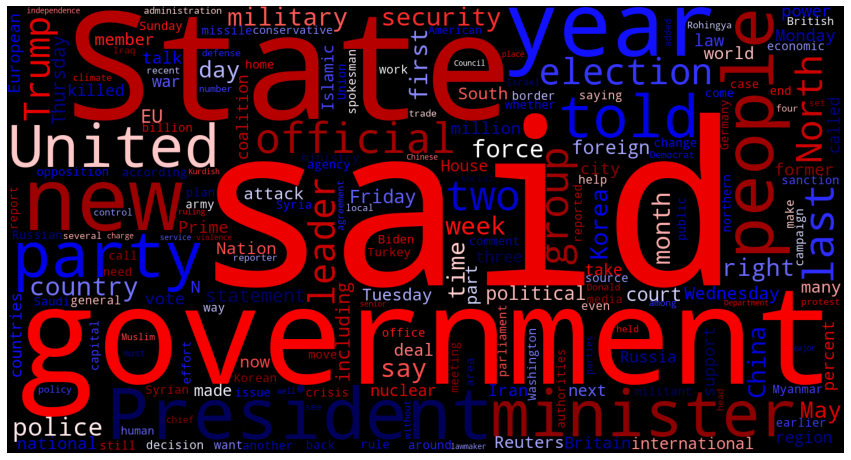

In [8]:
real_text = " ".join(row for row in real_df['text'].astype(str))

wordcloud_real = WordCloud(width= 1500, height = 800, random_state=1, background_color='black', colormap='seismic', collocations=False, stopwords=stopwords).generate(real_text)

plot_cloud(wordcloud_real, 15, 10)

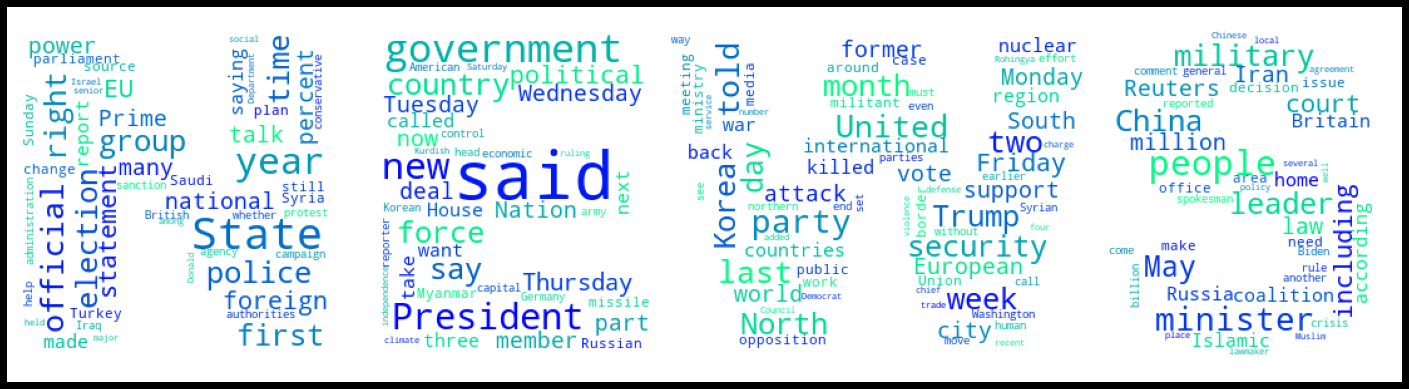

In [13]:
mask = np.array(Image.open('News_mask.png'))

wordcloud_real = WordCloud(width = 1000, height = 1000, random_state=1, background_color='white', colormap='winter', collocations=False, stopwords = stopwords, mask=mask).generate(real_text)

plot_cloud(wordcloud_real, 25, 10)

And the real headlines

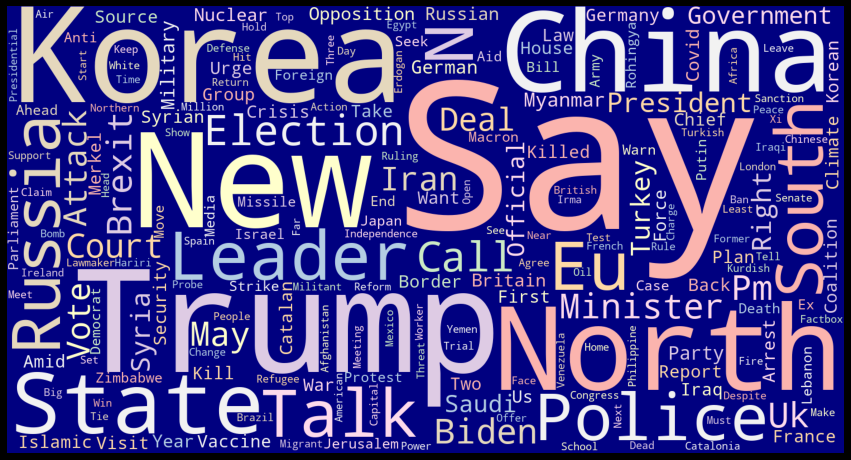

In [53]:
real_headlines = " ".join(row for row in real_df['headline'].astype(str))

wordcloud_fake = WordCloud(width= 1500, height = 800, random_state=1, background_color='navy', colormap='Pastel1', collocations=False, stopwords=stopwords).generate(real_headlines)

plot_cloud(wordcloud_fake, 15, 10)